In [ ]:
import pandas as pd
data=pd.read_csv('neu.csv')
data

,input,output
0,10,101
1,20,201
2,30,301
3,40,401
4,50,501
5,60,601
6,70,701
7,80,801
8,90,901
9,100,1001


In [ ]:
from os import X_OK
x=data[['input']].values
y=data[['output']].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
import torch

In [ ]:
x_train_tensor=torch.tensor(x_train,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32).view(-1,1)
x_test_tensor=torch.tensor(x_test,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32).view(-1,1)

In [ ]:
import torch.nn as nn
import torch.optim as optim
class Neuralnet(nn.Module):
   def __init__(self):
        super().__init__()
        self.n1=nn.Linear(1,10)
        self.n2=nn.Linear(10,20)
        self.n3=nn.Linear(20,1)
        self.relu=nn.ReLU()
        self.history={'loss': []}
   def forward(self,x):
        x=self.relu(self.n1(x))
        x=self.relu(self.n2(x))
        x=self.n3(x)
        return x

In [ ]:
sai_brain=Neuralnet()
criteria=nn.MSELoss()
optimizer=optim.RMSprop(sai_brain.parameters(),lr=0.001)

In [ ]:
def train_model(sai_brain,x_train,y_train,criteria,optmizer,epochs=4000):
    for i in range(epochs):
        optimizer.zero_grad()
        loss=criteria(sai_brain(x_train),y_train)
        loss.backward()
        optimizer.step()

        sai_brain.history['loss'].append(loss.item())
        if i%200==0:
            print(f"Epoch [{i}/epochs], loss: {loss.item():.6f}")

In [ ]:
train_model(sai_brain,x_train_tensor,y_train_tensor,criteria,optimizer)

Epoch [0/epochs], loss: 1283943.750000
Epoch [200/epochs], loss: 1228935.875000
Epoch [400/epochs], loss: 1111176.125000
Epoch [600/epochs], loss: 933497.250000
Epoch [800/epochs], loss: 711029.125000
Epoch [1000/epochs], loss: 475157.031250
Epoch [1200/epochs], loss: 271922.281250
Epoch [1400/epochs], loss: 148686.015625
Epoch [1600/epochs], loss: 110484.539062
Epoch [1800/epochs], loss: 92305.703125
Epoch [2000/epochs], loss: 71755.609375
Epoch [2200/epochs], loss: 51553.070312
Epoch [2400/epochs], loss: 32996.597656
Epoch [2600/epochs], loss: 17673.332031
Epoch [2800/epochs], loss: 6887.422852
Epoch [3000/epochs], loss: 1339.792358
Epoch [3200/epochs], loss: 72.973198
Epoch [3400/epochs], loss: 9.001875
Epoch [3600/epochs], loss: 1.659135
Epoch [3800/epochs], loss: 0.890221


In [ ]:
with torch.no_grad():
  test_loss=criteria(sai_brain(x_test_tensor),y_test_tensor)
  print(f"Loss:{test_loss.item():.6f}")

Loss:281.622253


In [ ]:
loss_df=pd.DataFrame(sai_brain.history)

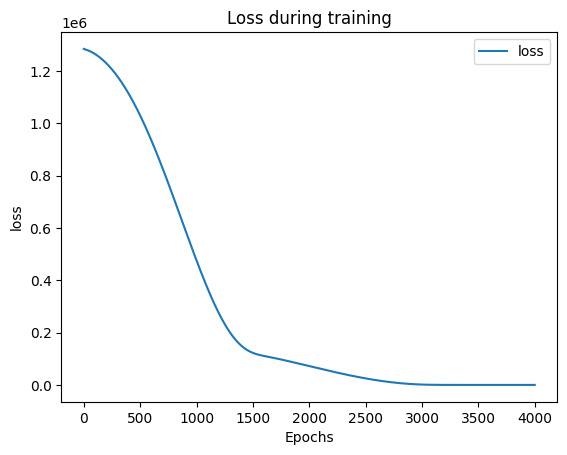

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss during training")
plt.show()

In [ ]:
x_n1_1=torch.tensor([[80]],dtype=torch.float32)
predict=sai_brain(torch.tensor(scaler.transform(x_n1_1),dtype=torch.float32)).item()
print(f"Prediction: {predict}")

Prediction: 801.7119750976562
